In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import scipy.stats as ss
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

Первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:
A – прямоугольные 16:9
B – квадратные
C – прямоугольные 12:4

In [2]:
df_1 = pd.read_csv('/home/jupyter-n.tkachenko-16/Lesson_5_ST/5_task_1.csv')
df_2 = pd.read_csv('/home/jupyter-n.tkachenko-16/Lesson_5_ST/5_task_2.csv')

In [4]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [10]:
gr_a = df_1.query('group == "A"').events
gr_b = df_1.query('group == "B"').events
gr_c = df_1.query('group == "C"').events
#Выделил отдельные группы для расчета по формуле Левена для понимания одинаковости (гомогенности)

In [11]:
sp.stats.levene(gr_a, gr_b, gr_c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

pvalue>0.05, значит дисперсии внутри групп примерно одинаковые

In [16]:
sp.stats.shapiro(gr_a.sample(1000, random_state=17))
#Применил критерий Шапиро-Уилка чтобы убедиться,что данные распределены нормально

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [17]:
sp.stats.shapiro(gr_b.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [18]:
sp.stats.shapiro(gr_c.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Данные во всех группах распределены нормально (pvalue>0.05)

In [19]:
sp.stats.f_oneway(gr_a, gr_b, gr_c)
#Провожу однофакторный дисперсионный анализ

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [20]:
print(pairwise_tukeyhsd(df_1['events'], groups=df_1['group']).summary())
#Использовал Критерий Тьюки,чтобы определить, между какими группами есть статистически значимые различия

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Значимые различия есть между A и B, A и C, B и C. Смотрим в пункт 'reject'. Везде 'True'.

Text(0, 0.5, 'Число покупок')

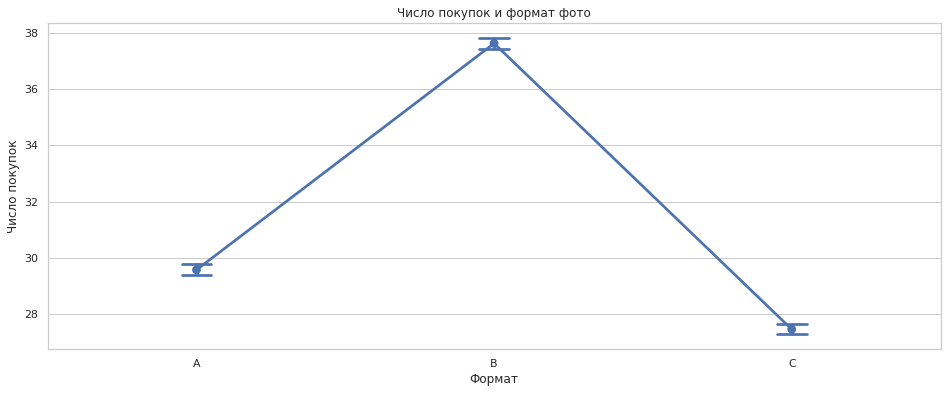

In [33]:
sns.pointplot(x='group', y='events', data=df_1, capsize=.1)
plt.title('Число покупок и формат фото')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

Итог: Используем квадратные картинки

Вторая задача:
Проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [22]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [23]:
gr_1 = df_2.query('group == "test"').events

In [25]:
gr_2 = df_2.query('group == "control"').events

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


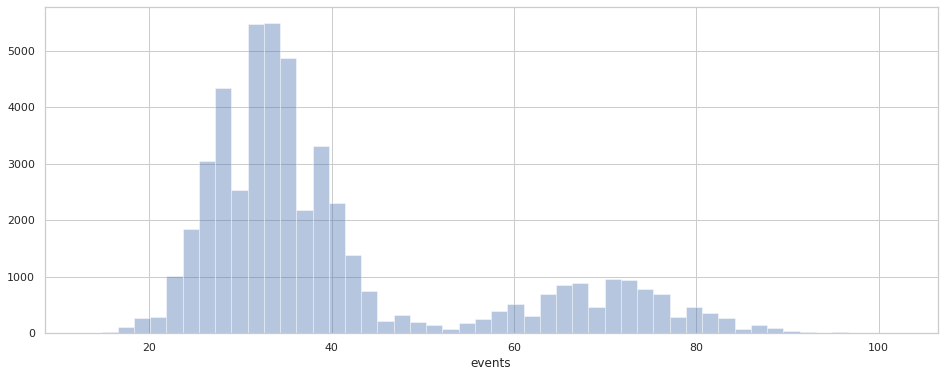

In [34]:
sns.distplot(gr_1, kde=False)

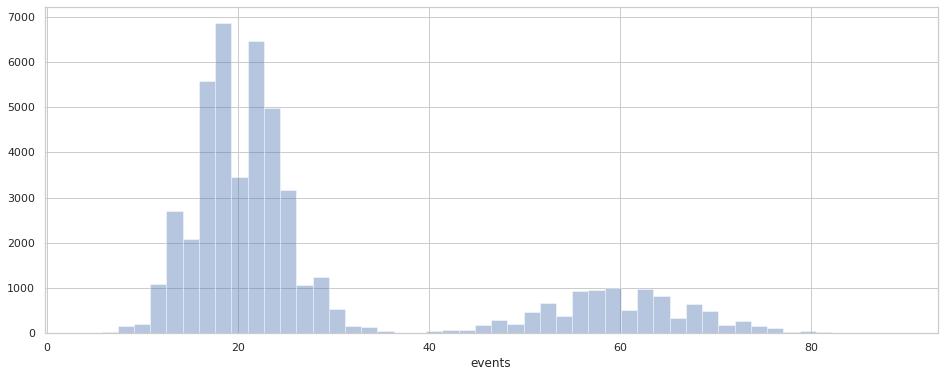

In [35]:
sns.distplot(gr_2, kde=False)

In [38]:
df_2.groupby(['group','segment']).events.describe().round(2)
#Посчитал среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя

count   mean   std   min   25%   50%   75%    max
group   segment                                                     
control high     10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

In [45]:
df_2['combination'] = df_2.group + ' \ ' + df_2.segment
#Добавил новую колонку соединив две другие

In [46]:
df_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [40]:
model = smf.ols(formula = 'events ~ segment + group + segment:group', data=df_2).fit()
#Провел тест, а затем использьзовал критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия

In [47]:
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [49]:
print(pairwise_tukeyhsd(df_2['events'], groups=df_2['combination']).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
Разница между control/high и test/high составила около 10
Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

Text(0, 0.5, 'Число покупок')

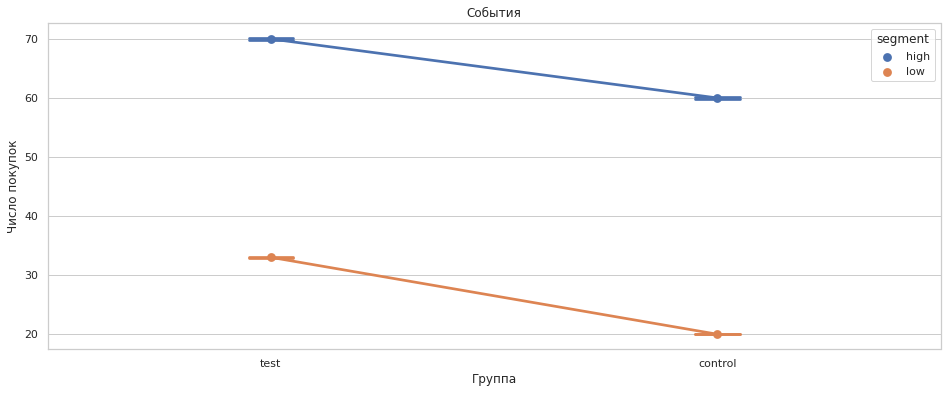

In [52]:
sns.pointplot(x='group', y='events', hue='segment', data=df_2, capsize=.1)
plt.title('События')
plt.xlabel('Группа')
plt.ylabel('Число покупок')

Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение: 
ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ